<a href="https://colab.research.google.com/github/bharathbolla/END2.0/blob/Assignment-4/END_2_0_Assignment_4_Quiz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
plt.style.use('seaborn-white')

# Read and process data. 

Download the file from this URL: https://drive.google.com/file/d/1UWWIi-sz9g0x3LFvkIZjvK1r2ZaCqgGS/view?usp=sharing

In [ ]:
data = open('/content/text.txt', 'r').read()

In [ ]:
print(data)

A coronavirus is a kind of common virus that causes an infection in your nose, sinuses, or upper throat. Most coronaviruses are not dangerous.

Some types of coronaviruses are serious, though. About 858 people have died from Middle East respiratory syndrome (MERS), which first appeared in 2012 in Saudi Arabia and then in other countries in the Middle East, Africa, Asia, and Europe. In April 2014, the first American was hospitalized for MERS in Indiana and another case was reported in Florida. Both had just returned from Saudi Arabia. In May 2015, there was an outbreak of MERS in Korea, which was the largest outbreak outside of the Arabian Peninsula. In 2003, 774 people died from a severe acute respiratory syndrome (SARS) outbreak. As of 2015, there were no further reports of cases of SARS. 

But in early 2020, following a December 2019 outbreak in China, the World Health Organization identified a new type, 2019 novel coronavirus (2019-nCoV).

Often a coronavirus causes upper respirator

In [ ]:
len(data)

10223

Process data and calculate indices

In [ ]:
chars = list(set(data))
data_size, X_size = len(data), len(chars)
print("Corona Virus article has %d characters, %d unique characters" %(data_size, X_size))
char_to_idx = {ch:i for i,ch in enumerate(chars)}
idx_to_char = {i:ch for i,ch in enumerate(chars)}

Corona Virus article has 10223 characters, 75 unique characters


# Constants and Hyperparameters

In [ ]:
Hidden_Layer_size = 10 #size of the hidden layer
Time_steps = 10 # Number of time steps (length of the sequence) used for training
learning_rate = 1e-1 # Learning Rate
weight_sd = 0.1 #Standard deviation of weights for initialization
z_size = Hidden_Layer_size + X_size #Size of concatenation(H, X) vector

# Activation Functions and Derivatives

In [ ]:
def sigmoid(x): # sigmoid function
  s = 1/(1 + np.exp(-x))
  return s # write your code here

def dsigmoid(y): # derivative of sigmoid function
  s = sigmoid(y)
  ds = s*(1-s)
  return  ds # write your code here

def tanh(x): # tanh function
  t = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
  return t # write your code here

def dtanh(x): # derivative of tanh
  t = tanh(x)
  dt = 1-t**2
  return dt # write your code here

In [ ]:
sigmoid(0)

0.5

In [ ]:
dsigmoid(0)

0.25

In [ ]:
tanh(dsigmoid(sigmoid(0)))

0.2307710272926823

In [ ]:
dtanh(tanh(dsigmoid(sigmoid(0))))

0.9485799654066528

# Quiz Question 1

What is the value of sigmoid(0) calculated from  your code? (Answer up to 1 decimal point, e.g. 4.2 and NOT 4.29999999, no rounding off).

# Quiz Question 2

What is the value of dsigmoid(sigmoid(0)) calculated from your code?? (Answer up to 2 decimal point, e.g. 4.29 and NOT 4.29999999, no rounding off). 

# Quiz Question 3

What is the value of tanh(dsigmoid(sigmoid(0))) calculated from your code?? (Answer up to 5 decimal point, e.g. 4.29999 and NOT 4.29999999, no rounding off).

# Quiz Question 4

What is the value of dtanh(tanh(dsigmoid(sigmoid(0)))) calculated from your code?? (Answer up to 5 decimal point, e.g. 4.29999 and NOT 4.29999999, no rounding off).

# Parameters

In [ ]:
class Param:
    def __init__(self, name, value):
      self.name = name
      self.v = value # parameter value
      self.d = np.zeros_like(value) # derivative
      self.m = np.zeros_like(value) # momentum for Adagrad

We use random weights with normal distribution (0, weight_sd) for  tanh  activation function and (0.5, weight_sd) for  `sigmoid`  activation function.

Biases are initialized to zeros.

# LSTM 
You are making this network, please note f, i, c and o (also "v") in the image below:
![alt text](http://blog.varunajayasiri.com/ml/lstm.svg)

Please note that we are concatenating the old_hidden_vector and new_input.

In [ ]:
np.random.randn(3, 4) 

array([[-1.6351586 ,  1.52141604,  0.36179297,  0.75805833],
       [ 0.16149452, -0.16577377,  0.87627283,  1.04235427],
       [ 1.12183893,  0.54592769,  0.05200398,  0.89328074]])

# Quiz Question 4

In the class definition below, what should be size_a, size_b, and size_c? ONLY use the variables defined above.

In [ ]:
Hidden_Layer_size = 100 #size of the hidden layer
Time_steps = 40 # Number of time steps (length of the sequence) used for training
learning_rate = 1e-1 # Learning Rate
weight_sd = 0.1 #Standard deviation of weights for initialization
z_size = Hidden_Layer_size + X_size #Size of concatenation(H, X) vector
X_size = 75

In [ ]:
H_size = 100 # Size of the hidden layer
T_steps = 45 # Number of time steps (length of the sequence) used for training
learning_rate = 1e-1 # Learning rate
weight_sd = 0.1 # Standard deviation of weights for initialization
z_size = H_size + X_size # Size of concatenate(H, X) vector
X_size = 75

In [ ]:
class Parameters:
    def __init__(self):
        self.W_f = Param('W_f', 
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_f = Param('b_f',
                         np.zeros((H_size, 1)))

        self.W_i = Param('W_i',
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_i = Param('b_i',
                         np.zeros((H_size, 1)))

        self.W_C = Param('W_C',
                         np.random.randn(H_size, z_size) * weight_sd)
        self.b_C = Param('b_C',
                         np.zeros((H_size, 1)))

        self.W_o = Param('W_o',
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_o = Param('b_o',
                         np.zeros((H_size, 1)))

        #For final layer to predict the next character
        self.W_v = Param('W_v',
                         np.random.randn(X_size, H_size) * weight_sd)
        self.b_v = Param('b_v',
                         np.zeros((X_size, 1)))
        
    def all(self):
        return [self.W_f, self.W_i, self.W_C, self.W_o, self.W_v,
               self.b_f, self.b_i, self.b_C, self.b_o, self.b_v]
        
parameters = Parameters()

Look at these operations which we'll be writing:

**Concatenation of h and x:**

$z\:=\:\left[h_{t-1},\:x\right]$

$f_t=\sigma\left(W_f\cdot z\:+\:b_f\:\right)$

$i_i=\sigma\left(W_i\cdot z\:+\:b_i\right)$

$\overline{C_t}=\tanh\left(W_C\cdot z\:+\:b_C\right)$

$C_t=f_t\ast C_{t-1}+i_t\ast \overline{C}_t$

$o_t=\sigma\left(W_o\cdot z\:+\:b_i\right)$

$h_t=o_t\ast\tanh\left(C_t\right)$

**Logits:**

$v_t=W_v\cdot h_t+b_v$

**Softmax:**

$\hat{y}=softmax\left(v_t\right)$


In [ ]:
def forward(x, h_prev, C_prev, p = parameters):
    assert x.shape == (X_size, 1)
    assert h_prev.shape == (H_size, 1)
    assert C_prev.shape == (H_size, 1)
    
    z = np.row_stack((h_prev, x))
    f = sigmoid(np.dot(p.W_f.v, z) + p.b_f.v)
    i = sigmoid(np.dot(p.W_i.v, z) + p.b_i.v)
    C_bar = tanh(np.dot(p.W_C.v, z) + p.b_C.v)

    C = f * C_prev + i * C_bar
    o = sigmoid(np.dot(p.W_o.v, z) + p.b_o.v)
    h = o * tanh(C)

    v = np.dot(p.W_v.v, h) + p.b_v.v
    y = np.exp(v) / np.sum(np.exp(v)) #softmax

    return z, f, i, C_bar, C, o, h, v, y

You must finish the function above before you can attempt the questions below. 

# Quiz Question 5

What is the output of 'print(len(forward(np.zeros((X_size, 1)), np.zeros((Hidden_Layer_size, 1)), np.zeros((Hidden_Layer_size, 1)), parameters)))'?

In [ ]:
print(len(forward(np.zeros((X_size, 1)), np.zeros((Hidden_Layer_size, 1)), np.zeros((Hidden_Layer_size, 1)), parameters)))

9


# Quiz Question 6. 

Assuming you have fixed the forward function, run this command: 
z, f, i, C_bar, C, o, h, v, y = forward(np.zeros((X_size, 1)), np.zeros((Hidden_Layer_size, 1)), np.zeros((Hidden_Layer_size, 1)))

Now, find these values:


1.   print(z.shape)
2.   print(np.sum(z))
3.   print(np.sum(f))

Copy and paste exact values you get in the logs into the quiz.



In [ ]:
z, f, i, C_bar, C, o, h, v, y = (forward(np.zeros((X_size, 1)), np.zeros((Hidden_Layer_size, 1)), np.zeros((Hidden_Layer_size, 1))))

print(z.shape)
print(np.sum(z))
print(np.sum(f))

(175, 1)
0.0
50.0


# Backpropagation

Here we are defining the backpropagation. It's too complicated, here is the whole code. (Please note that this would work only if your earlier code is perfect).

In [ ]:
def backward(target, dh_next, dC_next, C_prev,
             z, f, i, C_bar, C, o, h, v, y,
             p = parameters):
    
    assert z.shape == (X_size + Hidden_Layer_size, 1)
    assert v.shape == (X_size, 1)
    assert y.shape == (X_size, 1)
    
    for param in [dh_next, dC_next, C_prev, f, i, C_bar, C, o, h]:
        assert param.shape == (Hidden_Layer_size, 1)
        
    dv = np.copy(y)
    dv[target] -= 1

    p.W_v.d += np.dot(dv, h.T)
    p.b_v.d += dv

    dh = np.dot(p.W_v.v.T, dv)        
    dh += dh_next
    do = dh * tanh(C)
    do = dsigmoid(o) * do
    p.W_o.d += np.dot(do, z.T)
    p.b_o.d += do

    dC = np.copy(dC_next)
    dC += dh * o * dtanh(tanh(C))
    dC_bar = dC * i
    dC_bar = dtanh(C_bar) * dC_bar
    p.W_C.d += np.dot(dC_bar, z.T)
    p.b_C.d += dC_bar

    di = dC * C_bar
    di = dsigmoid(i) * di
    p.W_i.d += np.dot(di, z.T)
    p.b_i.d += di

    df = dC * C_prev
    df = dsigmoid(f) * df
    p.W_f.d += np.dot(df, z.T)
    p.b_f.d += df

    dz = (np.dot(p.W_f.v.T, df)
         + np.dot(p.W_i.v.T, di)
         + np.dot(p.W_C.v.T, dC_bar)
         + np.dot(p.W_o.v.T, do))
    dh_prev = dz[:Hidden_Layer_size, :]
    dC_prev = f * dC
    
    return dh_prev, dC_prev

# Forward and Backward Combined Pass

Let's first clear the gradients before each backward pass

In [ ]:
def clear_gradients(params = parameters):
    for p in params.all():
        p.d.fill(0)

Clip gradients to mitigate exploding gradients

In [ ]:
def clip_gradients(params = parameters):
    for p in params.all():
        np.clip(p.d, -1, 1, out=p.d)

Calculate and store the values in forward pass. Accumulate gradients in backward pass and clip gradients to avoid exploding gradients.

input, target are list of integers, with character indexes.
h_prev is the array of initial h at  h−1  (size H x 1)
C_prev is the array of initial C at  C−1  (size H x 1)
Returns loss, final  hT  and  CT

In [ ]:
def forward_backward(inputs, targets, h_prev, C_prev):
    global paramters
    
    # To store the values for each time step
    x_s, z_s, f_s, i_s,  = {}, {}, {}, {}
    C_bar_s, C_s, o_s, h_s = {}, {}, {}, {}
    v_s, y_s =  {}, {}
    
    # Values at t - 1
    h_s[-1] = np.copy(h_prev)
    C_s[-1] = np.copy(C_prev)
    
    loss = 0
    # Loop through time steps
    assert len(inputs) == Time_steps
    for t in range(len(inputs)):
        x_s[t] = np.zeros((X_size, 1))
        x_s[t][inputs[t]] = 1 # Input character
        
        (z_s[t], f_s[t], i_s[t],
        C_bar_s[t], C_s[t], o_s[t], h_s[t],
        v_s[t], y_s[t]) = \
            forward(x_s[t], h_s[t - 1], C_s[t - 1]) # Forward pass
            
        loss += -np.log(y_s[t][targets[t], 0]) # Loss for at t
        
    clear_gradients()

    dh_next = np.zeros_like(h_s[0]) #dh from the next character
    dC_next = np.zeros_like(C_s[0]) #dh from the next character

    for t in reversed(range(len(inputs))):
        # Backward pass
        dh_next, dC_next = \
            backward(target = targets[t], dh_next = dh_next,
                     dC_next = dC_next, C_prev = C_s[t-1],
                     z = z_s[t], f = f_s[t], i = i_s[t], C_bar = C_bar_s[t],
                     C = C_s[t], o = o_s[t], h = h_s[t], v = v_s[t],
                     y = y_s[t])

    clip_gradients()
        
    return loss, h_s[len(inputs) - 1], C_s[len(inputs) - 1]

# Sample the next character

In [ ]:
def sample(h_prev, C_prev, first_char_idx, sentence_length):
    x = np.zeros((X_size, 1))
    x[first_char_idx] = 1

    h = h_prev
    C = C_prev

    indexes = []
    
    for t in range(sentence_length):
        _, _, _, _, C, _, h, _, p = forward(x, h, C)
        idx = np.random.choice(range(X_size), p=p.ravel())
        x = np.zeros((X_size, 1))
        x[idx] = 1
        indexes.append(idx)

    return indexes

# Training (Adagrad)

Update the graph and display a sample output



In [ ]:
def update_status(inputs, h_prev, C_prev):
    #initialized later
    global plot_iter, plot_loss
    global smooth_loss
    
    # Get predictions for 200 letters with current model

    sample_idx = sample(h_prev, C_prev, inputs[0], 200)
    txt = ''.join(idx_to_char[idx] for idx in sample_idx)

    # Clear and plot
    plt.plot(plot_iter, plot_loss)
    display.clear_output(wait=True)
    plt.show()

    #Print prediction and loss
    print("----\n %s \n----" % (txt, ))
    print("iter %d, loss %f" % (iteration, smooth_loss))

# Update Parameters

\begin{align}
\theta_i &= \theta_i - \eta\frac{d\theta_i}{\sum dw_{\tau}^2} \\
d\theta_i &= \frac{\partial L}{\partial \theta_i}
\end{align}

In [ ]:
def update_paramters(params = parameters):
    for p in params.all():
        p.m += p.d * p.d # Calculate sum of gradients
        #print(learning_rate * dparam)
        p.v += -(learning_rate * p.d / np.sqrt(p.m + 1e-8))

To delay the keyboard interrupt to prevent the training from stopping in the middle of an iteration



In [ ]:
# Exponential average of loss
# Initialize to a error of a random model
smooth_loss = -np.log(1.0 / X_size) * Time_steps

iteration, pointer = 0, 0

# For the graph
plot_iter = np.zeros((0))
plot_loss = np.zeros((0))

# Training Loop

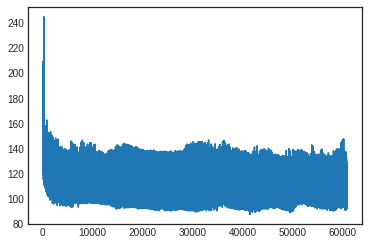

----
  tk mrp apilt e.
B –shng  thoop:t,a ud  cir 

YpDCerS  ,Edt tn yy padsononevne fh lens  cho d i il h irarDCnd le ituthoedlat wana  v c Houss hnlreGirUe ouPaTh itel oromafavofWomtiHr1m valto irito spdc 
----
iter 60900, loss 111.244651


In [ ]:
iter = 50000
while iter > 0:
  # Reset
  if pointer + Time_steps >= len(data) or iteration == 0:
      g_h_prev = np.zeros((Hidden_Layer_size, 1))
      g_C_prev = np.zeros((Hidden_Layer_size, 1))
      pointer = 0


  inputs = ([char_to_idx[ch] 
              for ch in data[pointer: pointer + Time_steps]])
  targets = ([char_to_idx[ch] 
              for ch in data[pointer + 1: pointer + Time_steps + 1]])

  loss, g_h_prev, g_C_prev = \
      forward_backward(inputs, targets, g_h_prev, g_C_prev)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001

  # Print every hundred steps
  if iteration % 100 == 0:
      update_status(inputs, g_h_prev, g_C_prev)

  update_paramters()

  plot_iter = np.append(plot_iter, [iteration])
  plot_loss = np.append(plot_loss, [loss])

  pointer += Time_steps
  iteration += 1
  iter = iter -1


# Quiz Question 7. 

Run the above code for 50000 iterations making sure that you have 100 hidden layers and time_steps is 40. What is the loss value you're seeing?